In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install mediapipe

  Using cached mediapipe-0.10.3-cp311-cp311-win_amd64.whl (50.2 MB)
  Using cached opencv_contrib_python-4.8.0.76-cp37-abi3-win_amd64.whl (44.8 MB)
  Using cached sounddevice-0.4.6-py3-none-win_amd64.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\pcss18\\AppData\\Local\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install os-sys

  Using cached os_sys-2.1.4-py3-none-any.whl (15.6 MB)
  Using cached pygubu-0.31-py3-none-any.whl (118 kB)
  Using cached sqlparse-0.4.4-py3-none-any.whl (41 kB)
  Using cached progress-1.6.tar.gz (7.8 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached progressbar-2.5.tar.gz (10 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Eel-0.16.0.tar.gz (24 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached extract_zip-1.0.0-py3-none-any.whl (2.6 kB)
INFO: pip is looking at multiple versions of os-sys to determine which version is compatible with other requirements. This could take a while.
  Using cached os_sys-2.1.3-py3-none-any.whl (15.5 MB)
  Using cached os_sys-2.1.2-py3-none-any.whl (15.4 MB)
  Using cached os_sys-2.1.1-py3-none-any.whl (15.4 MB)
  Using cached os_sys-2.1.0-py3-n

ERROR: os-sys has an invalid wheel, os-sys has an invalid wheel, could not read 'os_sys-1.9.3.dist-info/WHEEL' file: KeyError("There is no item named 'os_sys-1.9.3.dist-info/WHEEL' in the archive")


Found 3430 images belonging to 36 classes.
Found 2317 images belonging to 36 classes.
Epoch 1/30
214/214 [==============================] - 75s 319ms/step - loss: 4.5300 - accuracy: 0.7401 - val_loss: 1.0391 - val_accuracy: 0.9774
Epoch 2/30
214/214 [==============================] - 41s 190ms/step - loss: 0.7672 - accuracy: 0.9982 - val_loss: 0.5941 - val_accuracy: 1.0000
Epoch 3/30
214/214 [==============================] - 41s 191ms/step - loss: 0.5169 - accuracy: 0.9994 - val_loss: 0.4462 - val_accuracy: 1.0000
Epoch 4/30
214/214 [==============================] - 42s 194ms/step - loss: 0.3908 - accuracy: 0.9994 - val_loss: 0.3431 - val_accuracy: 1.0000
Epoch 5/30
214/214 [==============================] - 40s 185ms/step - loss: 0.3133 - accuracy: 1.0000 - val_loss: 0.2813 - val_accuracy: 1.0000
Epoch 6/30
214/214 [==============================] - 41s 193ms/step - loss: 0.2640 - accuracy: 0.9997 - val_loss: 0.2526 - val_accuracy: 1.0000
Epoch 7/30
214/214 [========================

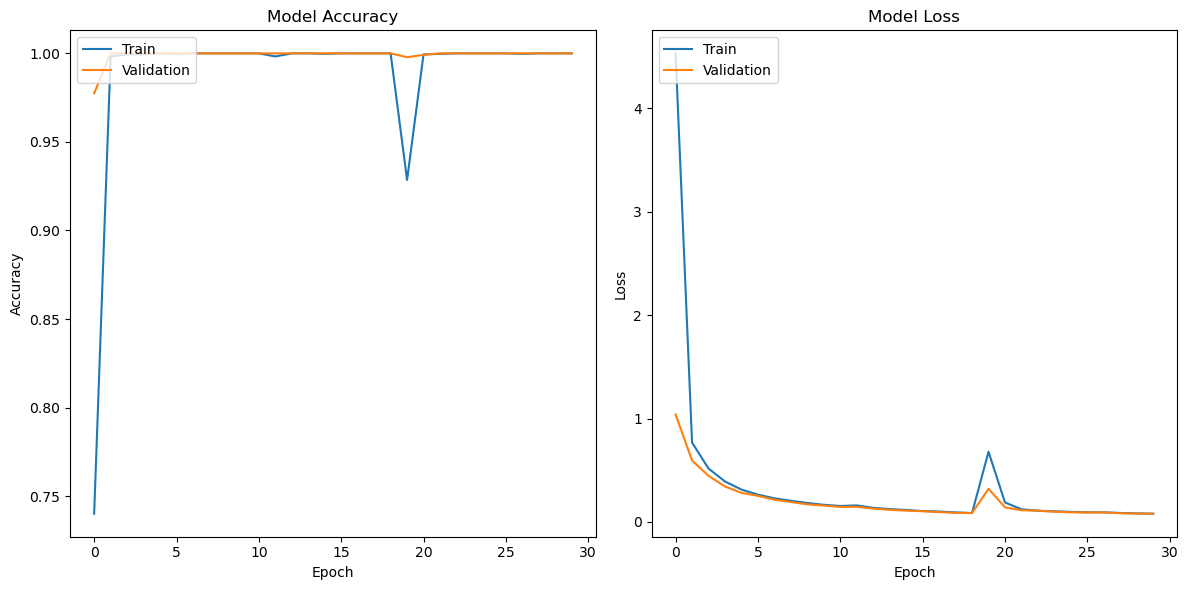

In [1]:
#Model Building
import os
import cv2
import numpy as np
import random
import shutil
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Bidirectional, LSTM, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2

# function to split data into train and val directories
def split_data(source, train, val, split_size):
    files = os.listdir(source)
    random.shuffle(files)
    split_index = int(split_size * len(files))
    train_files = files[:split_index]
    val_files = files[split_index:]

    for file in train_files:
        shutil.copy(os.path.join(source, file), os.path.join(train, file))

    for file in val_files:
        shutil.copy(os.path.join(source, file), os.path.join(val, file))

# function to process images
def process_images(from_dir, to_dir):
    os.makedirs(to_dir, exist_ok=True)

    # Process images and copy them to the target directory
    for file in os.listdir(from_dir):
        hand_img = cv2.imread(os.path.join(from_dir, file))
        if hand_img is not None:
            hand_img = cv2.resize(hand_img, (100, 100))  # Resize to smaller image size
            cv2.imwrite(os.path.join(to_dir, file), hand_img)

source_dir = 'processed_data'
train_dir = 'train'
val_dir = 'val'

# train and validation directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Split and process data
for label in os.listdir(source_dir):
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)
    os.makedirs(os.path.join(val_dir, label), exist_ok=True)
    split_data(os.path.join(source_dir, label), os.path.join(train_dir, label), os.path.join(val_dir, label),
               split_size=0.8)
    process_images(os.path.join(train_dir, label), os.path.join(train_dir, label))
    process_images(os.path.join(val_dir, label), os.path.join(val_dir, label))

img_size = (100, 100)  
batch_size = 16  

# classes 
n_classes = len(os.listdir(train_dir))

train_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_datagen = ImageDataGenerator(rescale=1. / 255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Define the model
model = Sequential()

# Add CNN layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))  # Additional Conv2D layer
model.add(MaxPooling2D((2, 2)))  # Additional MaxPooling2D layer
model.add(Flatten())

# Add Bidirectional LSTM layer
model.add(Reshape((1, -1)))  # You might need to modify this depending on your dataset
model.add(Bidirectional(LSTM(64)))

# Add a dense layer with L2 regularization
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.1)))

# Add the output layer
model.add(Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and collect history for learning curves
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# Save the trained model
model.save('model_with_regularization.keras')
